# 네이버 영화랭킹 페이지 리뷰 수집

### 모듈 import

- reqeusts : 실제 웹페이지의 HTML 정보를 불러올 때 사용
- beautifulsoup : 가져온 HTML 정보 중 실제 원하는 데이터만 가져옴

In [34]:
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd

### 크롤링할 url

In [35]:
url = 'https://movie.naver.com/movie/bi/mi/point.naver?code=208077'

In [36]:
res = req.get(url)

In [37]:
res

<Response [200]>

> **Response[200]**    
요청한 정보를 잘 가져왔다는 응답 코드

### 텍스트 추출

In [38]:
soup = bs(res.text, 'lxml')

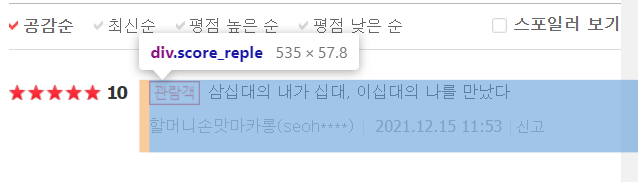

In [39]:
# 평점 텍스트 부분의 class 선택
soup.select('div.score_reple')

[<div class="score_reple">
 <p>우리의 '위대한' 이웃으로 거듭난 스파이더맨</p>
 <dl>
 <dt>씨네21</dt>
 <dd>
 																| 김현수
 															</dd>
 </dl>
 </div>,
 <div class="score_reple">
 <p>인간의 선한 본성을 믿는 프랜차이즈가 지닌 힘</p>
 <dl>
 <dt>씨네21</dt>
 <dd>
 																| 임수연
 															</dd>
 </dl>
 </div>,
 <div class="score_reple">
 <p>영리하게 끊으면서 더 끈끈한 웹스윙 이어가기</p>
 <dl>
 <dt>씨네21</dt>
 <dd>
 																| 김철홍
 															</dd>
 </dl>
 </div>,
 <div class="score_reple">
 <p>사랑과 헌신과 추억의 곡예에 갈채를</p>
 <dl>
 <dt>씨네21</dt>
 <dd>
 																| 박평식
 															</dd>
 </dl>
 </div>,
 <div class="score_reple">
 <p>소년에서 청년으로, 다사다난한 기록</p>
 <dl>
 <dt>씨네21</dt>
 <dd>
 																| 이용철
 															</dd>
 </dl>
 </div>]

> class 이름을 부를 때는 .키워드를 사용   
> id 이름을 부를 때는 # 키워드를 사용

위 코드에서 반환된 텍스트들은 실제 영화의 평점이 아닌   
페이지 하단의 텍스트들이다.    
우리가 원하는 평점 텍스트들은 iframe으로 다른 페이지에 저장된 정보들이므로   
페이지 속성에서 iframe 검색 후 해당 페이지의 url을 가져와야 한다.

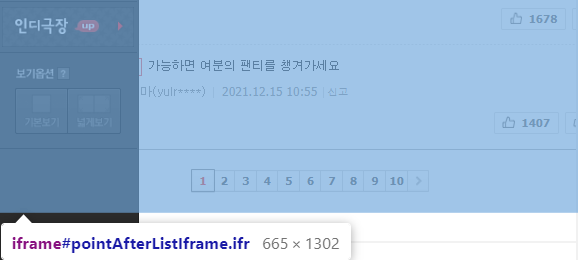

### url 수정

In [40]:
# iframe 태그에 있는 url 불러옴
url_sub = '/movie/bi/mi/pointWriteFormList.naver?code=208077&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'

In [41]:
# url_sub는 다른 주소에 저장되어있는 툴이므로 기존 url을 해당 데이터만 있는 url로 바꿔줌
url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=208077&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'

In [42]:
res = req.get(url)

In [43]:
soup = bs(res.text, 'lxml')

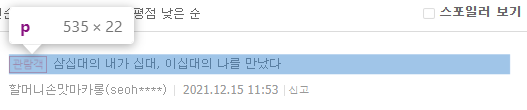

- .text : 텍스트만 가져옴
- .strip() : 필요없는 데이터들을 전부 잘라줌

In [44]:
# score_reple 클래스에 p태그에 있는 텍스트만 선택
reple_list = soup.select('div.score_reple > p ')

In [45]:
# reple_list에 있는 텍스트를 필요한 부분만 반복 추출
for reple in reple_list:
    print(reple.text.strip())

관람객


														
															
															
																삼십 대의 내가 십 대, 이십 대의 나를 만났다
관람객


														
															
															
																스파이더맨 1 부터 본 사람이면 재미없을 수가 없다
관람객


														
															
															
																전 스파이더맨  두명이 자책했던 일들이 여기서 어느정도 구원받았다는거에  감사드립니다
관람객


														
															
															
																엔드게임을 뛰어넘는 영화가 죽기전에 나올까 생각했었는데.. 2년만에 나왔습니다
관람객


														
															
															
																마블이 준비한 크리스마스 선물
관람객


														
															
															
																21세기 가장 최고의 X소리 : 어벤져스 이후 마블 영화는 안봄.
관람객

스포일러가 포함된 감상평입니다. 감상평 보기

														
															
															
																잼민이새끼 개빡치네. 내가 닥스였으면 혈압 터져서 죽었음
관람객


														
															
															
																개인적으로 그린 고블린이 살렸다
관람객

스포일러가 포함된 감상평입니다. 감상평 보기

														
															
															
																원하는거 다 보여줌 ㅋㅋㅋㅋ
관람객


														
															
															
								

### 불필요한 텍스트 제거

1. '관람객' 이라는 텍스트는 필요 없으므로 제거

- extract() : 어떠한 데이터를 지울 때 사용

In [46]:
# '관람객'을 나타내는 클래스를 검색하여 불러옴
icon = soup.select('span.ico_viewer')
icon

[<span class="ico_viewer">관람객</span>,
 <span class="ico_viewer">관람객</span>,
 <span class="ico_viewer">관람객</span>,
 <span class="ico_viewer">관람객</span>,
 <span class="ico_viewer">관람객</span>,
 <span class="ico_viewer">관람객</span>,
 <span class="ico_viewer">관람객</span>,
 <span class="ico_viewer">관람객</span>,
 <span class="ico_viewer">관람객</span>,
 <span class="ico_viewer">관람객</span>]

In [47]:
# icon 리스트 요소 반복 삭제
for viewer in icon:
    viewer.extract()

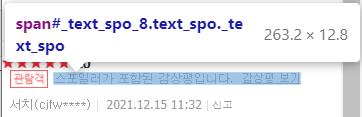

2. 스포일러 댓글 텍스트도 제거 필요함

In [48]:
# 스포일러 댓글 선택
spo = soup.select('span.text_spo')
spo

[<span class="text_spo _text_spo" id="_text_spo_6">스포일러가 포함된 감상평입니다. <a class="btn_more" href="javascript:void(0);" onclick="showMovieReview('6');" role="button">감상평 보기</a></span>,
 <span class="text_spo _text_spo" id="_text_spo_8">스포일러가 포함된 감상평입니다. <a class="btn_more" href="javascript:void(0);" onclick="showMovieReview('8');" role="button">감상평 보기</a></span>]

In [49]:
# spop 리스트 요소 반복 삭제
for spo_text in spo:
    spo_text.extract()

In [50]:
# 제거 확인
for reple in reple_list:
    print(reple.text.strip())

삼십 대의 내가 십 대, 이십 대의 나를 만났다
스파이더맨 1 부터 본 사람이면 재미없을 수가 없다
전 스파이더맨  두명이 자책했던 일들이 여기서 어느정도 구원받았다는거에  감사드립니다
엔드게임을 뛰어넘는 영화가 죽기전에 나올까 생각했었는데.. 2년만에 나왔습니다
마블이 준비한 크리스마스 선물
21세기 가장 최고의 X소리 : 어벤져스 이후 마블 영화는 안봄.
잼민이새끼 개빡치네. 내가 닥스였으면 혈압 터져서 죽었음
개인적으로 그린 고블린이 살렸다
원하는거 다 보여줌 ㅋㅋㅋㅋ
닥터옥토버스가 토비에게 "다컸구나 잘지냈니?" 는 어린시절 스파이더맨보고자란 사람들에게 하는말 같았고 토비의 "애쓰고있죠" 또한 내 상황에 너무 잘들어맞아 울컥했다


### 1~20 페이지의 평점 텍스트 확인

In [52]:
replelist = []
for page in range(1, 21) :
    
    # page는 숫자형인데 url에 페이지 번호는 문자형이므로 str()으로 page를 문자형으로 바꿈
    url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=208077&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page='+str(page)
    res = req.get(url)
    soup = bs(res.text, 'lxml')
    
    # 댓글 영역 선택
    reples = soup.select('div.score_reple > p')
    
    # 관람객 선택, 제거
    icon = soup.select('span.ico_viewer')
    for viewer in icon:
        viewer.extract()  
        
    # 스포일러 텍스트 선택, 제거
    spo = soup.select('span.text_spo')
    for spo_text in spo:
        spo_text.extract()
    
    # 전처리 한 댓글
    for reple in reples:
        replelist.append(reple.text.strip())

### 데이터 프레임 변환

In [53]:
info = {'review' : replelist}

In [54]:
df = pd.DataFrame(info)

In [55]:
df.set_index('review')

""
review
"삼십 대의 내가 십 대, 이십 대의 나를 만났다"
스파이더맨 1 부터 본 사람이면 재미없을 수가 없다
전 스파이더맨 두명이 자책했던 일들이 여기서 어느정도 구원받았다는거에 감사드립니다
엔드게임을 뛰어넘는 영화가 죽기전에 나올까 생각했었는데.. 2년만에 나왔습니다
마블이 준비한 크리스마스 선물
...
영화보면서 내가 타임머신 탄 기분 이었음여러 감정이 뒤섞이면서 눈물나는 명작
미쳤음 스포 당하지 말고 보세요
그냥 최고임 이건 무조건 봐야되


### csv 파일로 저장

In [ ]:
df.to_csv('영화 리뷰 크롤링.csv')